# Reflecting Bear
## Background
Panda Bear is confused. He is trying to work out how things should look when reflected in a mirror, but is getting the wrong results.
As is the way with bears, his coordinate system is not orthonormal: so what he thinks is the direction perpendicular to the mirror isn't actually the direction the mirror reflects in.
Help Bear write a code that will do his matrix calculations properly! 

## Instructions
In this assignment you will write a Python function that will produce a transformation matrix for reflecting vectors in an arbitrarily angled mirror.

Building on the last assingment, where you wrote a code to construct an orthonormal basis that spans a set of input vectors, here you will take a matrix which takes simple form in that basis, and transform it into our starting basis.
Recall the from the last video,

\\( T = E T_E E^{-1} \\)

You will write a function that will construct this matrix.
This assessment is not conceptually complicated, but will build and test your ability to express mathematical ideas in code.
As such, your final code submission will be relatively short, but you will receive less structure on how to write it.

### Matrices in Python
For this exercise, we shall make use of the @ operator again.
Recall from the last exercise, we used this operator to take the dot product of vectors.
In general the operator will combine vectors and/or matrices in the expected linear algebra way,
i.e. it will be either the vector dot product, matrix multiplication, or matrix operation on a vector, depending on it's input.
For example to calculate the following expressions,

\\( a = \mathbf{s}\cdot\mathbf{t} \\)

\\( \mathbf{s} = A\mathbf{t} \\)

\\( M = A B \\),

One would use the code,
```python
a = s @ t
s = A @ t
M = A @ B
```
(This is in contrast to the \\(*\\) operator, which performs element-wise multiplication, or multiplication by a scalar.)

You may need to use some of the following functions:
```python
inv(A)
transpose(A)
gsBasis(A)
```
These, respectively, take the inverse of a matrix, give the transpose of a matrix, and produce a matrix of orthonormal column vectors given a general matrix of column vectors - i.e. perform the Gram-Schmidt process.
This exercise will require you to combine some of these functions.

### How to submit
Edit the code in the cell below to complete the assignment.
Once you are finished and happy with it, press the *Submit Assignment* button at the top of this notebook.

Please don't change any of the function names, as these will be checked by the grading script.

In [80]:
# PACKAGE
# Run this cell once first to load the dependancies. There is no need to submit this cell.
import numpy as np
from numpy.linalg import norm, inv
from numpy import transpose
from readonly.bearNecessities import *

In [81]:
# GRADED FUNCTION
# This is the cell you should edit and submit.

# In this function, you will return the transformation matrix T,
# having built it out of an orthonormal basis set E that you create from Bear's Basis
# and a transformation matrix in the mirror's coordinates TE.
def build_reflection_matrix(bearBasis) : # The parameter bearBasis is a 2×2 matrix that is passed to the function.
    # Use the gsBasis function on bearBasis to get the mirror's orthonormal basis.
    E = gsBasis(bearBasis)
    # Write a matrix in component form that perform's the mirror's reflection in the mirror's basis.
    # Recall, the mirror operates by negating the last component of a vector.
    # Replace a,b,c,d with appropriate values
    TE = np.array([[1, 0],
                   [0, -1]])
    # Combine the matrices E and TE to produce your transformation matrix.
    T = E @ TE @ transpose(E) # could be inv(E), but E is orthonormal so it is simpler to use transpose 
    # Finally, we return the result. There is no need to change this line.
    return T


## Test your code before submission
To test the code you've written above, run the cell (select the cell above, then press the play button [ ▶| ] or press shift-enter).
You can then use the code below to test out your function.
You don't need to submit this cell; you can edit and run it as much as you like.

The code below will show a picture of Panda Bear.
If you have correctly implemented the function above, you will also see Bear's reflection in his mirror.

/home/jovyan/work/readonly/bearNecessities.py:31: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  ax.set_axis_bgcolor(blue1)


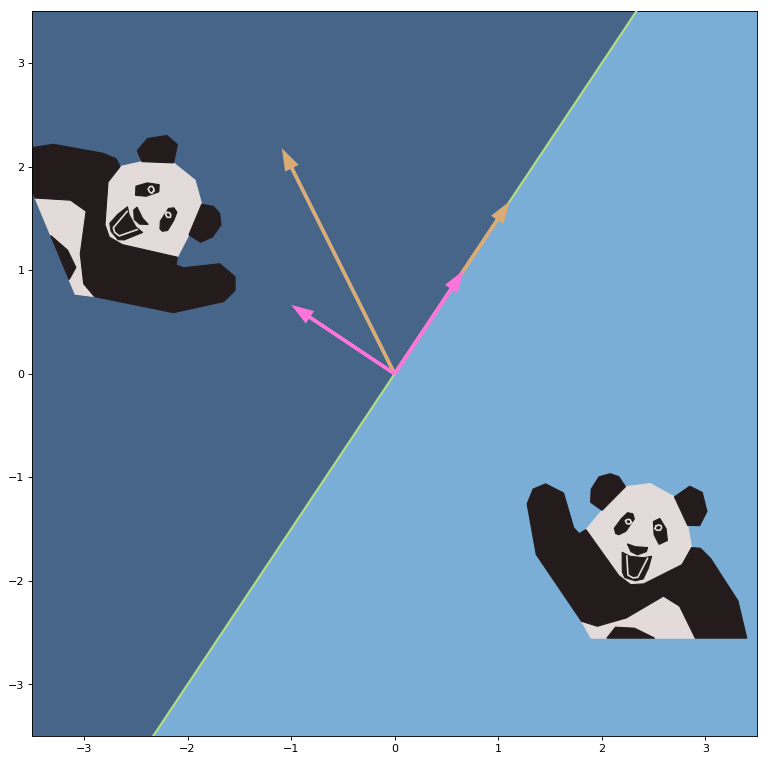

In [82]:
# First load Pyplot, a graph plotting library.
%matplotlib inline
import matplotlib.pyplot as plt

# This is the matrix of Bear's basis vectors. 
bearBasis = np.array(
    [[1,   -1],
     [1.5, 2]])
# This line uses your code to build a transformation matrix for us to use.
T = build_reflection_matrix(bearBasis)

# Bear is drawn as a set of polygons, the vertices of which are placed as a matrix list of column vectors.
# We have three of these non-square matrix lists: bear_white_fur, bear_black_fur, and bear_face.
# We'll make new lists of vertices by applying the T matrix you've calculated.
reflected_bear_white_fur = T @ bear_white_fur
reflected_bear_black_fur = T @ bear_black_fur
reflected_bear_face = T @ bear_face

# This next line runs a code to set up the graphics environment.
ax = draw_mirror(bearBasis)

# We'll first plot Bear, his white fur, his black fur, and his face.
ax.fill(bear_white_fur[0], bear_white_fur[1], color=bear_white, zorder=1)
ax.fill(bear_black_fur[0], bear_black_fur[1], color=bear_black, zorder=2)
ax.plot(bear_face[0], bear_face[1], color=bear_white, zorder=3)

# Next we'll plot Bear's reflection.
ax.fill(reflected_bear_white_fur[0], reflected_bear_white_fur[1], color=bear_white, zorder=1)
ax.fill(reflected_bear_black_fur[0], reflected_bear_black_fur[1], color=bear_black, zorder=2)
ax.plot(reflected_bear_face[0], reflected_bear_face[1], color=bear_white, zorder=3);
